# Inhalt

- Recap functions
- ipdb
- Objects and OOP
- Inheritance

# Debugger

## In normal .py files

In [ ]:
# first run `pip install ipdb` in your environment
import ipdb
ipdb.set_trace()

## In Jupyter/IPhython notebooks

In [ ]:
import IPython.core as ipc
ipdb = ipc.debugger.Pdb()

https://wangchuan.github.io/coding/2017/07/12/ipdb-cheat-sheet.html

# Object

Up to now we learned about variables and functions.

In [ ]:
# avariable
my_var = 13
print(my_var)
# a function
def some_function(arg1, arg2):
    print(arg1)
    return arg1*arg1 + arg2*arg2

print(some_function)
print(some_function(3, 4))

We also learned about modules which are a collection of variables and functions.

In [ ]:
import my_module

print(my_module.some_variable)

print(my_module.a_function())

However, if you want to program, say an energy model, you will realize pretty soon that it would be handy to have more complexe variables. For example: an energy production device, an energy sink, a distribution bus. A collection of the previous items could define an energy system. 

Each of those would have common characteristics with specific values. For example, all energy production devices have an output power, it might not be the same for all devices. They could also be a function associated with each device, which would return the cost per kWh for a given output power.

We could use dict for that no?

In [ ]:
def prod_cost_function(power):
    """Compute production cost in euro per kWh
    
    :param power: instantaneous power in kW
    
    :return: cost in euro per kWh
    """
    return 12 * power

energy_prod_device = {"output_power": 12000, "production_cost": prod_cost_function}

print(energy_prod_device["output_power"])

print(energy_prod_device["production_cost"](3000))

That works :)

However, we want to be able to define multiple energy production devices and that would involve a lot of copy pasting!

**!!! Important rule !!!**
If you copy paste code, ask yourself: do I need to do it more than once? If yes --> do not copy paste!

So dict are no the best solution after all, we need a new concept: an object!

An object is a collection of variables and functions which can be easily created without need of copy-pasting the essential code.

When building houses, we distinguish the plan of the house from the house implementation, we could build many copies of a house from the same plan. With object, the plan is called a *class* and each object created from this class is an *instance* from this class. The class contains the definition of the common characteristics shared by its instances.

## Class

In [ ]:
class Rectangle:
    # das sind die Attibute von der Class 'Rectangle'
    length=None
    width=None

In [ ]:
# eine Rectanglesinstanz kreieren
a_rectangle = Rectangle()
print(a_rectangle.length, a_rectangle.width)

# you can modify the attributes of the instance of Rectangle
a_rectangle.length = 10
a_rectangle.width = 2
print(a_rectangle.length, a_rectangle.width)

another_rectangle = Rectangle()
another_rectangle.length = 12
another_rectangle.width = 13
print(another_rectangle.length, another_rectangle.width)

Not so handy to define the object's attributes

It would be nice to define the length and width directly when creating the instance of the Rectangle class

In [ ]:
class Rectangle:
    length=None
    width=None
    # "self" is a special keyword here, __init__ is also a special function, more later
    def __init__(self, length, width):
        self.length = length
        self.width = width
        
# eine Rectanglesinstanz kreieren
a_rectangle = Rectangle(10, 2)
print(a_rectangle.length, a_rectangle.width)

another_rectangle = Rectangle(12, 13)
print(another_rectangle.length, another_rectangle.width)

Better, right?

In [ ]:
# Compact class definition
Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

# eine Rectanglesinstanz kreieren
a_rectangle = Rectangle(10, 2)
print(a_rectangle.length, a_rectangle.width)

In [ ]:
# Class methods = function which are linked to the instances of the class
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width
    # "self" is always at first position in methods arguments list
    # this function belongs to the class "Rectangle" (and is therefore a method)
    def compute_area(self):
        area = 0
        if self.length is not None and self.width is not None:
            area = self.length * self.width
        return area

a_rectangle = Rectangle(10, 2)
print(a_rectangle.compute_area())

Classes name convention: https://www.python.org/dev/peps/pep-0008/#class-names


## Encapsulation: Public, Private and Protected

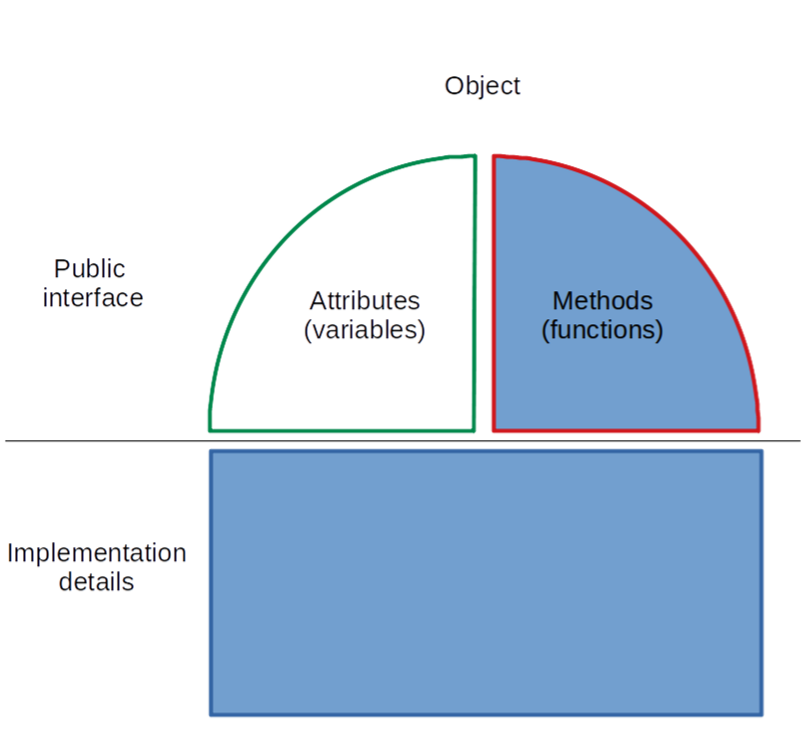

### Encapsulation

group the attributes and methods of a similar "concept" into an object

### Abstraction

focus on what is characteristic to this "concept", hide the details to the user of the object

In [ ]:
class Employee:
    def __init__(self, name, sal):
        self.haircolor = "black"  # public attribute
        self._name = name  # protected attribute 
        self.__salary = sal  # private attribute

empl = Employee("Smith", 1300)
print(empl.haircolor)
print(empl._name)
print(empl.__salary)

The idea behind encapsulation is to NEVER let the user modify attributes directly ..., python wants the user to be able to see everything (underscore or double underscore) :), so it will be possible but it should be discouraged (like going to touch the eletric line of the Sbahn is possible but discouraged :P)

There is more control achievable, when the attributes are modified within the methods of the class (i.e. one can add type testing of the value, for example, one could test that the __salary value must lie between a min and a max value. If direct assignation of the attribute is possible, it can be set to any value which might not be desired.

## Objects recap

- defined by a *class*, each object is an *instance* of a class
- a way to write less code and to structure the code with concepts

## Inheritance, going further and reuse code even more!

We can now push the abstraction even further. We could create other classes, Square, Circle, Triangle etc... They all have something in common, right? They are all geometrical shapes, for example they all have an area, they all have a perimeter, etc... we could define all this in a class

In [ ]:
class GeomShape:
    """This is a description of the class"""
    
    num_edge = None

    def __init__(self, num_edges, name = "", **kwargs):
        """This is a description of the method"""
        
        #the kwargs is a way to pass keywords arguments without knowing
        #how many beforhand, they will be contained in a dict
        for arg in kwargs:
            print(arg, kwargs[arg])        
        
        #We want to make sure the number of edges is not impossible
        if num_edges < 3 :
            raise ValueError("a GeomShape needs to have more than 3 edges")
        else:
            if isinstance(num_edges, int):
                self.num_edge = num_edges
            else:
                raise TypeError("Your should input int only")
        
    def area(self):
        pass
    
    def perimeter(self):
        pass

# we indicate here that Rectangle is a child class of GeomShape
class Rectangle(GeomShape):
    def __init__(self, length, width):
        # this calls the __init__ method of the GeomShape parent class
        super().__init__(num_edges=4)
        self.length = length
        self.width = width
    def area(self):
        area = 0
        if self.length is not None and self.width is not None:
            area = self.length * self.width
        return area

    def perimeter(self):
        perimeter = 0
        if self.length is not None and self.width is not None:
            perimeter = 2 * (self.length + self.width)
        return perimeter
        
a_rectangle = Rectangle(10, 2)
print(a_rectangle.area())
print(a_rectangle.perimeter())

We can go deeper, a Square is a rectangle with equal sides

In [ ]:
class Square(Rectangle):
    def __init__(self, length):
        # this calls the __init__ method of the Rectangle parent class
        super().__init__(length,  length)

# We don't need to write more than that, it inherits from its parents methods
a_square = Square(10)
print(a_square.area())
print(a_square.perimeter())

*An advantage is that when you modify the parent class and add new useful code, then all children classes will direcly have acces to it without you to have to copy paste any code!*

*Another advantage is that you can really conceptualize before coding (what object should I code, what should be available to the end user etc..., this opens up the possibility to extend collaboration with non coders on the concept and help have an overview of code structure*

References:

- https://www.python.org/dev/peps/pep-0008/#designing-for-inheritance
- https://www.python.org/dev/peps/pep-0008/#public-and-internal-interfaces